<a href="https://colab.research.google.com/github/halaalduh/Diabetes-Prediction-using-Healthcare-Dataset/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/Healthcare-Diabetes.csv")



In [22]:
# Show dataset info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [23]:
# Identify categorical columns
categorical_cols = ['Outcome']

# Summarize categorical columns
print("Value counts for Outcome:")
print(df['Outcome'].value_counts())

Value counts for Outcome:
Outcome
0    1816
1     952
Name: count, dtype: int64


In [24]:

# Summarize missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df)


Missing Values Summary:
                          Missing Count  Missing Percent
Id                                    0              0.0
Pregnancies                           0              0.0
Glucose                               0              0.0
BloodPressure                         0              0.0
SkinThickness                         0              0.0
Insulin                               0              0.0
BMI                                   0              0.0
DiabetesPedigreeFunction              0              0.0
Age                                   0              0.0
Outcome                               0              0.0


In [25]:
#Numeric attributes
numeric_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
                'Insulin','BMI','DiabetesPedigreeFunction','Age']

In [26]:

#Five Number Summary
print("Five Number Summary:")
five_num_summary = df[numeric_cols].describe().loc[['min','25%','50%','75%','max']]
print(five_num_summary)


Five Number Summary:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
min          0.0      0.0            0.0            0.0      0.0   0.000   
25%          1.0     99.0           62.0            0.0      0.0  27.300   
50%          3.0    117.0           72.0           23.0     37.0  32.200   
75%          6.0    141.0           80.0           32.0    130.0  36.625   
max         17.0    199.0          122.0          110.0    846.0  80.600   

     DiabetesPedigreeFunction   Age  
min                     0.078  21.0  
25%                     0.244  24.0  
50%                     0.375  29.0  
75%                     0.624  40.0  
max                     2.420  81.0  


In [27]:
#Statistical summary
print("Statistical Summary:")
statistical_summary = df[numeric_cols].describe()
print(statistical_summary)

Statistical Summary:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age  
count  2768.000000               2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225  
std       8.076127                  0.325669    11.777230  
min       0.000000                  

In [62]:
# Outlier detection using IQR
#Number of outliers in each column
outlier_data = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    count = outliers.shape[0]


    outlier_data.append({'Column': col, 'Outlier Count': count})


outlier_df = pd.DataFrame(outlier_data)

print("Outlier Summary:\n")
print(outlier_df)

Outlier Summary:

                     Column  Outlier Count
0               Pregnancies             16
1                   Glucose              0
2             BloodPressure             49
3             SkinThickness            316
4                   Insulin              0
5                       BMI             38
6  DiabetesPedigreeFunction              0
7                       Age             64


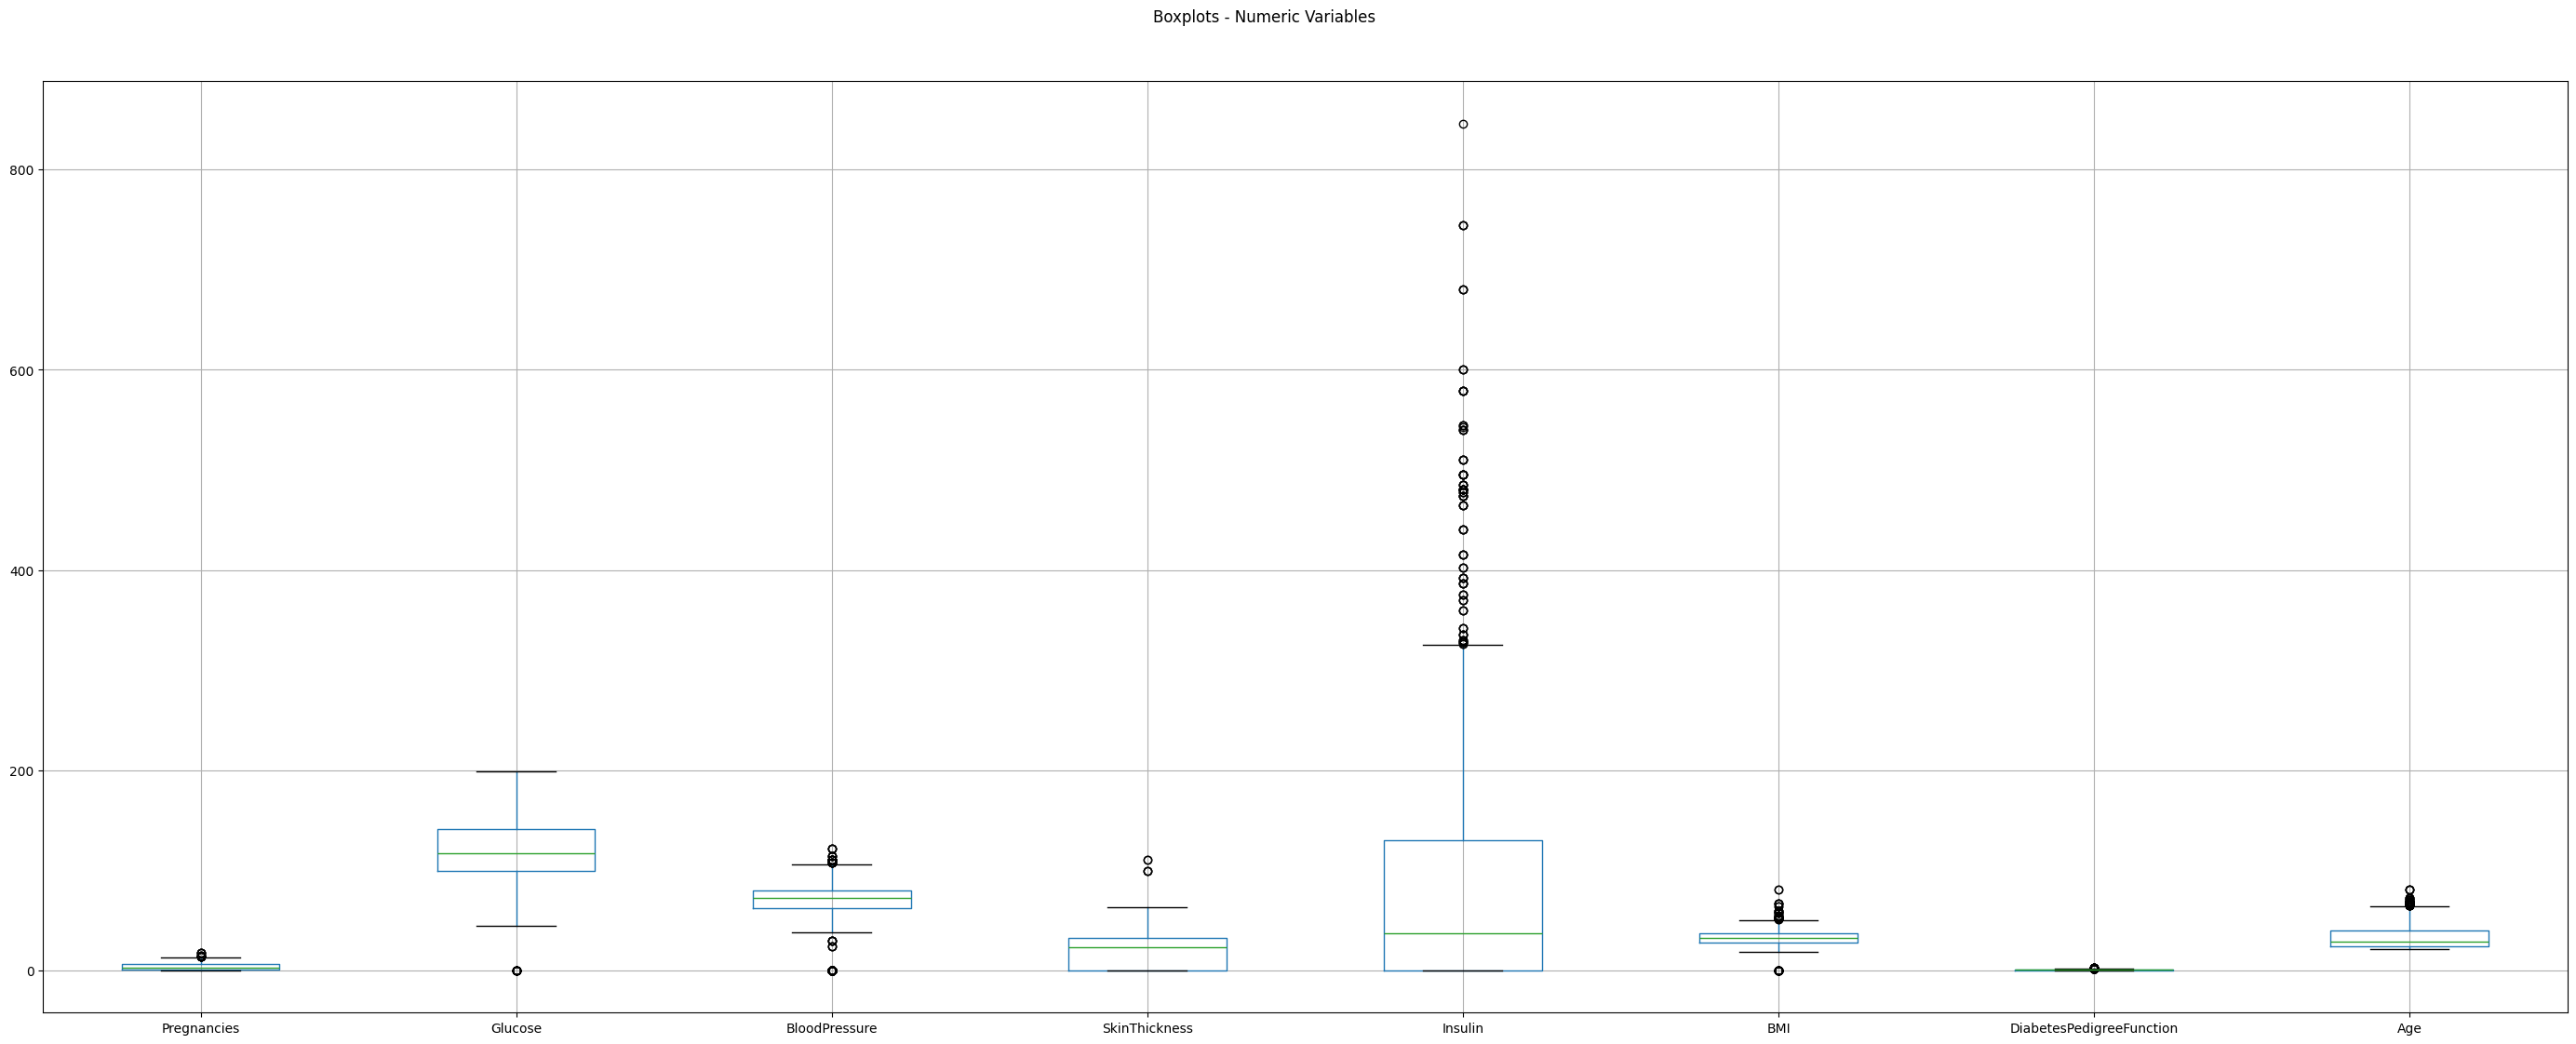

In [28]:
#Boxplots - Numeric Variables
df.boxplot(column=numeric_cols,figsize=(35,13))
plt.suptitle("Boxplots - Numeric Variables",y=.94)
plt.show()

The boxplots show the distribution and outliers of numeric variables. Most variables have some outliers, especially Insulin, which shows many extreme values. Glucose, BloodPressure, BMI, and Age have moderate spreads, while Pregnancies and DiabetesPedigreeFunction have smaller ranges. This helps identify data variability and detect unusual values.

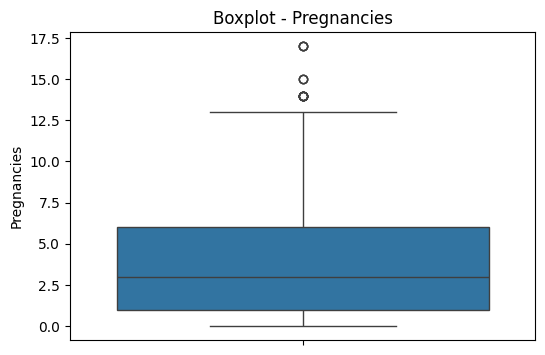

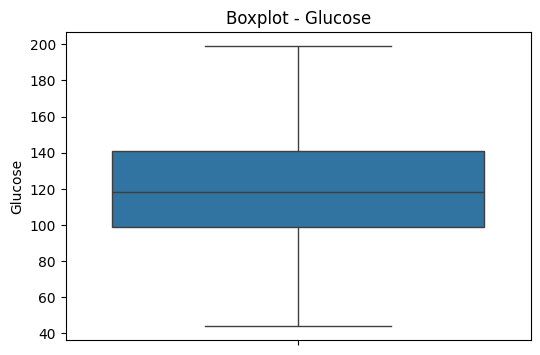

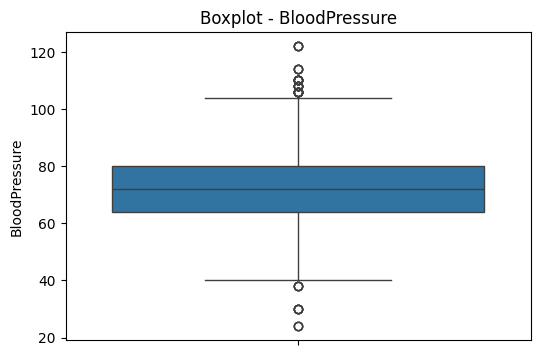

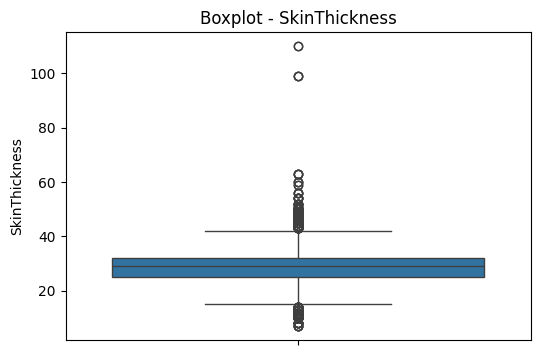

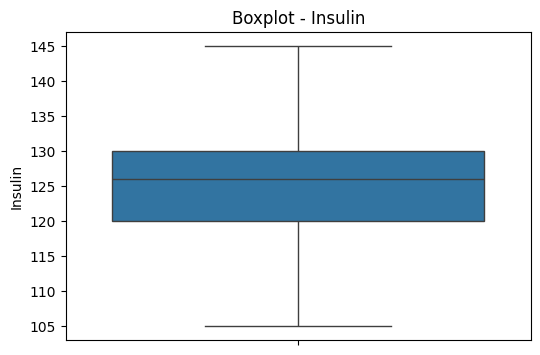

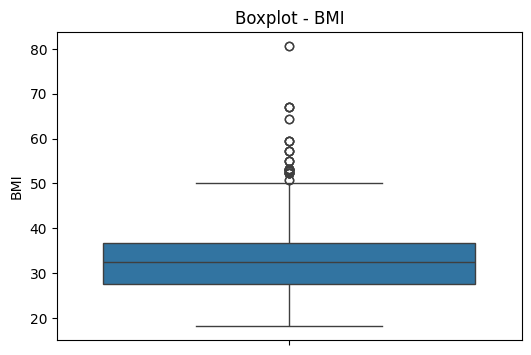

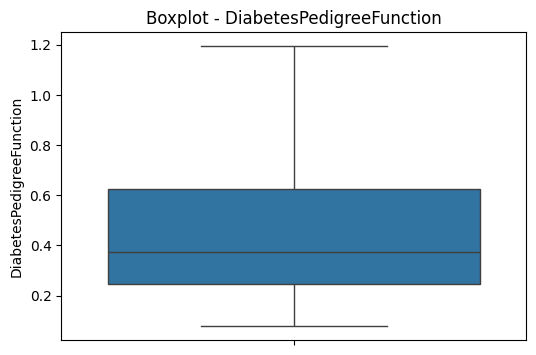

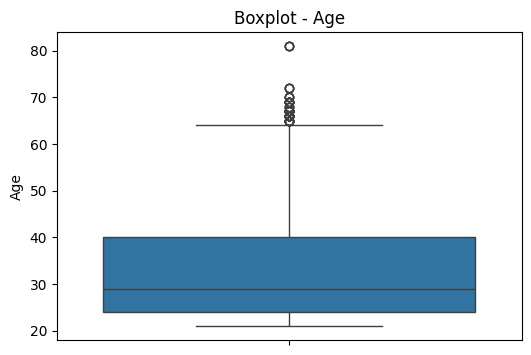

In [47]:
#Boxplots for each numeric attribute
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


Each boxplot shows the distribution of values for each numeric variable separately, helping to observe data spread and detect outliers.

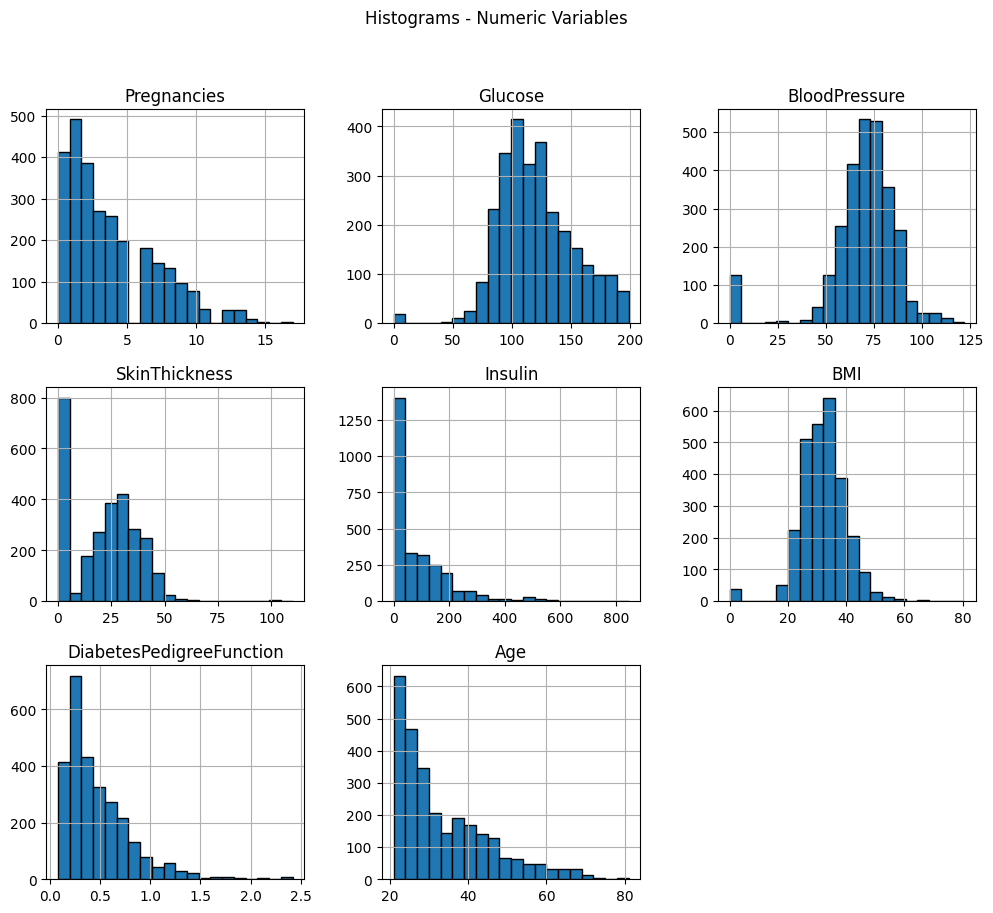

In [30]:

#Histograms for each numeric attribute
df[numeric_cols].hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Histograms - Numeric Variables")
plt.show()


The histograms display the distribution of the dataset’s numeric variables. Variables like *Pregnancies*, *Insulin*, *DiabetesPedigreeFunction*, and *Age* are showing many low values and few high ones. Meanwhile, *Glucose*, *BloodPressure*, and *BMI* have more balanced, roughly normal distributions, indicating values concentrated around the average. This visualization helps identify how each variable is spread across the dataset.


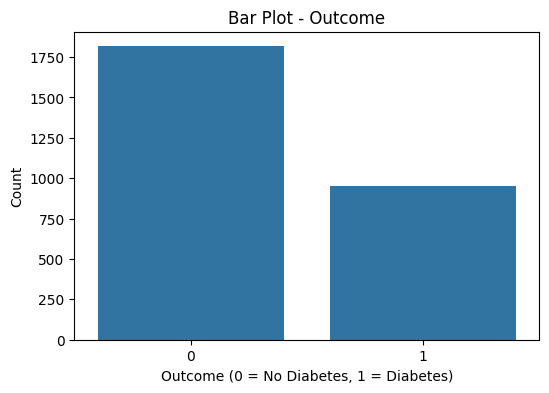

In [31]:
# 2. Visualizations

# Bar Plot for Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome' , data=df )
plt.title('Bar Plot - Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

 we can see that most people in the dataset do not have diabetes (Outcome 0), while fewer people have diabetes (Outcome 1). This indicates an imbalance in the dataset.


<function matplotlib.pyplot.show(close=None, block=None)>

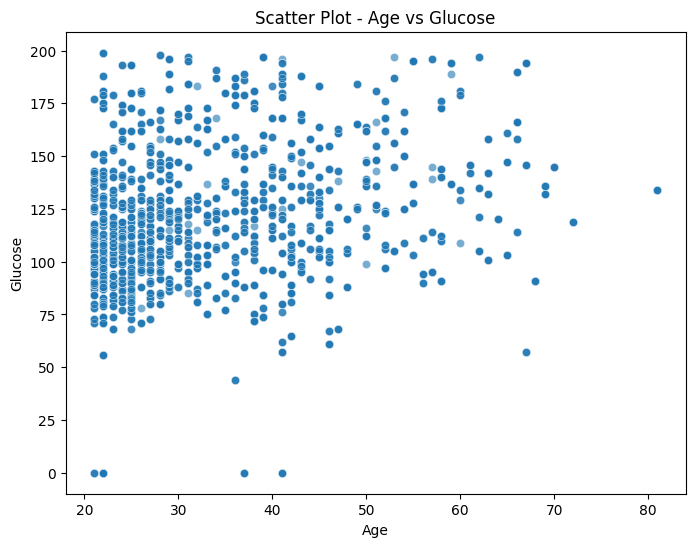

In [32]:

# Scatter Plot between two numeric columns
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Glucose', data=df, alpha=0.6)
plt.title('Scatter Plot - Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show


The scatter plot shows the relationship between Age and Glucose. It indicates that glucose levels vary widely for all ages, with no clear pattern between age and glucose.

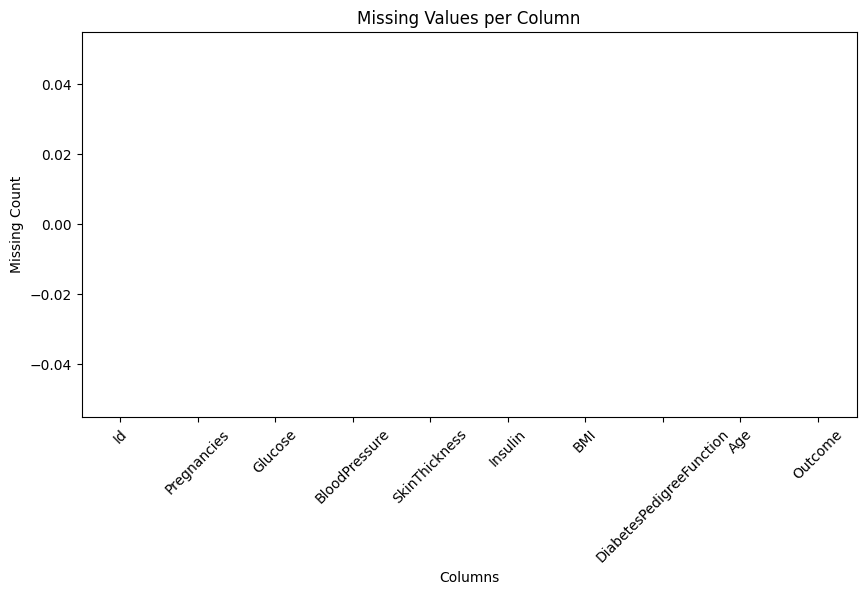

In [33]:
 #Missing Values Bar Plot

missing_count = df.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values
})

plt.figure(figsize=(10,5))
sns.barplot(x='Column', y='Missing Count', data=missing_df, color='red')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.show()

There are no missing values in the data, as shown by the bar plot — all categories have complete data.


# **Handling Missing Values**

Replaced zeros in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN, then filled missing values using mean or median.This improved data accuracy by removing unrealistic zeros and completing missing records.


In [34]:
# Columns where zero is invalid
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

# Check missing values again
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,18
BloodPressure,125
SkinThickness,800
Insulin,1330
BMI,39
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# **The data after handling missing values**

In [35]:
# Imputation strategy
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# **Handling Outlier**
Detected and handled outliers in numeric columns using the IQR (Interquartile Range) method. Extreme values in attributes like Insulin and DiabetesPedigreeFunction were capped within acceptable limits. This step reduced the effect of extreme values and made the data distribution more balanced and reliable.

In [44]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return np.where(series < lower, lower, np.where(series > upper, upper, series))

df['Insulin'] = cap_outliers(df['Insulin'])
df['DiabetesPedigreeFunction'] = cap_outliers(df['DiabetesPedigreeFunction'])


# **Noise Removal**
Used a moving average smoothing method to reduce random fluctuations in numeric features.This step helped remove noise and made data patterns clearer.

In [ ]:
# Noise removal using rolling mean (smoothing)
for col in ['Glucose', 'BloodPressure', 'BMI']:
    df[col] = df[col].rolling(window=3, min_periods=1).mean()

df.head()

# **Discretization**
Converted continuous values into categories for better interpretability. Age was grouped into ranges (20–29, 30–39, etc.), and Glucose was classified as Normal, Prediabetes, or Diabetes. This helps algorithms identify patterns more effectively.

In [63]:
# ===== Discretization (Binning) =====
# Discretize Age into categories
df['Age_Bin'] = pd.cut(df['Age'],
                       bins=[20, 30, 40, 50, 60, 80],
                       labels=["20-29","30-39","40-49","50-59","60+"])

# Discretize Glucose into categories
df['Glucose_Bin'] = pd.cut(df['Glucose'],
                           bins=[0, 99, 125, 200],
                           labels=["Normal","Prediabetes","Diabetes"])

# Show first rows with new bins
df[['Age', 'Age_Bin', 'Glucose', 'Glucose_Bin']].head()

,Age,Age_Bin,Glucose,Glucose_Bin
0,50,40-49,148.0,Diabetes
1,31,30-39,85.0,Normal
2,32,30-39,183.0,Diabetes
3,21,20-29,89.0,Normal
4,33,30-39,137.0,Diabetes


# **Normalization**
Applied MinMaxScaler to scale numeric values between 0 and 1.This ensured that all attributes have equal influence on the models.

In [ ]:
# Drop Id column (not useful)
df = df.drop(columns=['Id'])

# Apply Min-Max Normalization [0,1] only to numeric columns
scaler = MinMaxScaler()

# Select only numeric columns
num_cols = df.select_dtypes(include=[np.number]).drop(columns=['Outcome']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

In [ ]:
# Save preprocessed dataset
df.to_csv("Preprocessed_dataset.csv", index=False)
print("Preprocessed dataset saved as Preprocessed_dataset.csv")